<a href="https://colab.research.google.com/github/ShangWeiKuo/Portfolio/blob/main/Python/Classification/Multiclass/Wafer/Model_evaluation_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 讀取 libraries
import numpy as np 
from numpy import argmax
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, auc, roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

# 設定當前工作目錄
import os
path="/content/drive/MyDrive/wafer/"
os.chdir(path)
print(os.listdir(path))

['wafer-defect-classification-by-deep-learning.ipynb', 'Untitled1.ipynb', 'Wafer detection.ipynb', 'wafer.zip', 'LSWMD.pkl', 'Wafer anomaly detection_AutoEncoder.ipynb', 'Wafer anomaly detection_Denoising AutoEncoder.ipynb', 'Wafer anomaly detection.ipynb', 'Wafer classification_KFold.ipynb', 'Wafer classification_Densenet201_PyTorch.ipynb', 'model', 'Wafer preprocess.ipynb', 'wafer_detection_mobilenet_model.h5', 'Wafer classification_MobileNet-V2.ipynb', 'wafer_detection_resnet_model.h5', 'Wafer classification_ResNet101.ipynb', 'wafer_detection_xception_model.h5', 'Wafer classification_Xception.ipynb', 'wafer_detection_efficientnet_model.h5', 'Wafer classification_EfficientNetB7.ipynb', 'Wafer classification_Densenet201_v2.ipynb', 'wafer_detection_densenet_model.h5', 'Wafer classification_Inception-v3.ipynb', 'rawdata.npz', 'Wafer classification_Densenet201.ipynb', 'Model_evaluation_comparison.ipynb']


In [2]:
# 讀取模型
Mobilenet = tf.keras.models.load_model(path + "model/Mobilenet")
Resnet = tf.keras.models.load_model(path + "model/Resnet")
Densenet = tf.keras.models.load_model(path + "model/Densenet")
# Inception = tf.keras.models.load_model(path + "model/Inception")
Xception = tf.keras.models.load_model(path + "model/Xception")
Efficientnet = tf.keras.models.load_model(path + "model/Efficientnet")

In [3]:
# 讀取測試資料(npz壓縮檔)
df=np.load('rawdata.npz')
X_test = df['X_test']
y_test = df['y_test']
df.close()

In [4]:
# Evaluation
score_M = Mobilenet.evaluate(X_test, y_test)
print('Test Accuracy:', score_M[1])
score_R = Resnet.evaluate(X_test, y_test)
print('Test Accuracy:', score_R[1])
score_D = Densenet.evaluate(X_test, y_test)
print('Test Accuracy:', score_D[1])
# score_I = Inception.evaluate(X_test, y_test)
# print('Test Accuracy:', score_I[1])
score_X = Xception.evaluate(X_test, y_test)
print('Test Accuracy:', score_X[1])
score_E = Efficientnet.evaluate(X_test, y_test)
print('Test Accuracy:', score_E[1])

160/160 [==============================] - 18s 102ms/step - loss: 0.3606 - accuracy: 0.8719
Test Accuracy: 0.8718652129173279
160/160 [==============================] - 121s 746ms/step - loss: 0.3668 - accuracy: 0.8983
Test Accuracy: 0.8983150720596313
160/160 [==============================] - 102s 616ms/step - loss: 0.2909 - accuracy: 0.9007
Test Accuracy: 0.9006661176681519
160/160 [==============================] - 79s 488ms/step - loss: 0.4312 - accuracy: 0.8507
Test Accuracy: 0.8507053256034851
160/160 [==============================] - 186s 1s/step - loss: 0.4026 - accuracy: 0.8580
Test Accuracy: 0.8579545617103577


In [5]:
# 將預測值轉換為二進位的矩陣向量
def ConverToBinary(x):
  onehot_encoder = OneHotEncoder(sparse=False)
  x = x.reshape(len(x), 1)
  x = onehot_encoder.fit_transform(x)
  return x

In [6]:
def Prediction(x):
  pred = x.predict(X_test)
  pred = np.argmax(pred, axis=1)
  return pred

In [7]:
# 取出真實值類別
true = np.argmax(y_test, axis=1)

In [9]:
M_pre = Prediction(Mobilenet)
R_pre = Prediction(Resnet)
D_pre = Prediction(Densenet)
X_pre = Prediction(Xception)
E_pre = Prediction(Efficientnet)

In [32]:
bar_plot_value = {}

In [33]:
# 混淆矩陣 (Confusion Matrix) - MobileNet
M_cm = classification_report(true, M_pre, output_dict=True)
bar_plot_value['MobileNet'] = M_cm['accuracy']
print(classification_report(true, M_pre))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       831
           1       0.81      0.80      0.81       110
           2       0.79      0.86      0.82      1083
           3       0.98      0.96      0.97      1924
           4       0.70      0.80      0.75       718
           5       0.89      0.79      0.84       171
           6       0.65      0.34      0.45       234
           7       0.89      0.73      0.80        33

    accuracy                           0.87      5104
   macro avg       0.83      0.78      0.80      5104
weighted avg       0.87      0.87      0.87      5104



In [34]:
# 混淆矩陣 (Confusion Matrix) - ResNet
R_cm = classification_report(true, R_pre, output_dict=True)
bar_plot_value['ResNet'] = R_cm['accuracy']
print(classification_report(true, R_pre))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       831
           1       0.85      0.83      0.84       110
           2       0.85      0.86      0.86      1083
           3       0.97      0.97      0.97      1924
           4       0.77      0.82      0.79       718
           5       0.92      0.82      0.87       171
           6       0.74      0.63      0.68       234
           7       0.70      0.91      0.79        33

    accuracy                           0.90      5104
   macro avg       0.84      0.85      0.84      5104
weighted avg       0.90      0.90      0.90      5104



In [35]:
# 混淆矩陣 (Confusion Matrix) - DenseNet
D_cm = classification_report(true, D_pre, output_dict=True)
bar_plot_value['DenseNet'] = D_cm['accuracy']
print(classification_report(true, D_pre))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       831
           1       0.81      0.83      0.82       110
           2       0.84      0.88      0.86      1083
           3       0.97      0.97      0.97      1924
           4       0.81      0.78      0.79       718
           5       0.90      0.85      0.87       171
           6       0.71      0.62      0.66       234
           7       0.81      0.88      0.84        33

    accuracy                           0.90      5104
   macro avg       0.85      0.85      0.85      5104
weighted avg       0.90      0.90      0.90      5104



In [ ]:
# 混淆矩陣 (Confusion Matrix) - Inception
# I_cm = classification_report(true, I_pre, output_dict=True)
# print(I_cm)

In [36]:
# 混淆矩陣 (Confusion Matrix) - Xception
X_cm = classification_report(true, X_pre, output_dict=True)
bar_plot_value['Xception'] = X_cm['accuracy']
print(classification_report(true, X_pre))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       831
           1       0.75      0.71      0.73       110
           2       0.75      0.82      0.78      1083
           3       0.95      0.96      0.96      1924
           4       0.67      0.74      0.70       718
           5       0.87      0.79      0.83       171
           6       0.69      0.25      0.37       234
           7       0.92      0.73      0.81        33

    accuracy                           0.85      5104
   macro avg       0.82      0.74      0.77      5104
weighted avg       0.85      0.85      0.85      5104



In [38]:
# 混淆矩陣 (Confusion Matrix) - Efficientnet
E_cm = classification_report(true, E_pre, output_dict=True)
bar_plot_value['EfficientNet'] = E_cm['accuracy']
print(classification_report(true, E_pre))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       831
           1       0.73      0.82      0.77       110
           2       0.75      0.84      0.79      1083
           3       0.96      0.96      0.96      1924
           4       0.73      0.70      0.71       718
           5       0.88      0.77      0.82       171
           6       0.70      0.33      0.45       234
           7       0.76      0.79      0.78        33

    accuracy                           0.86      5104
   macro avg       0.80      0.77      0.78      5104
weighted avg       0.86      0.86      0.85      5104



In [40]:
eval_df = np.array(
            [
              [
               round(bar_plot_value['MobileNet'], 3), 
               round(bar_plot_value['ResNet'], 3), 
               round(bar_plot_value['DenseNet'], 3), 
               round(bar_plot_value['Xception'], 3),
               round(bar_plot_value['EfficientNet'], 3)
              ]
            ]
          )

eval_df = pd.DataFrame(eval_df, columns=['MobileNet', 'ResNet', 'DenseNet', 'Xception', 'EfficientNet'])
rowname = np.array(['Accuracy'])
eval_df.index = rowname
eval_df

,MobileNet,ResNet,DenseNet,Xception,EfficientNet
Accuracy,0.872,0.898,0.901,0.851,0.858


In [41]:
true_roc = ConverToBinary(true)

In [52]:
D_roc = ConverToBinary(D_pre)

In [54]:
# 計算 AUC 值
test_auc = roc_auc_score(true_roc, D_roc)

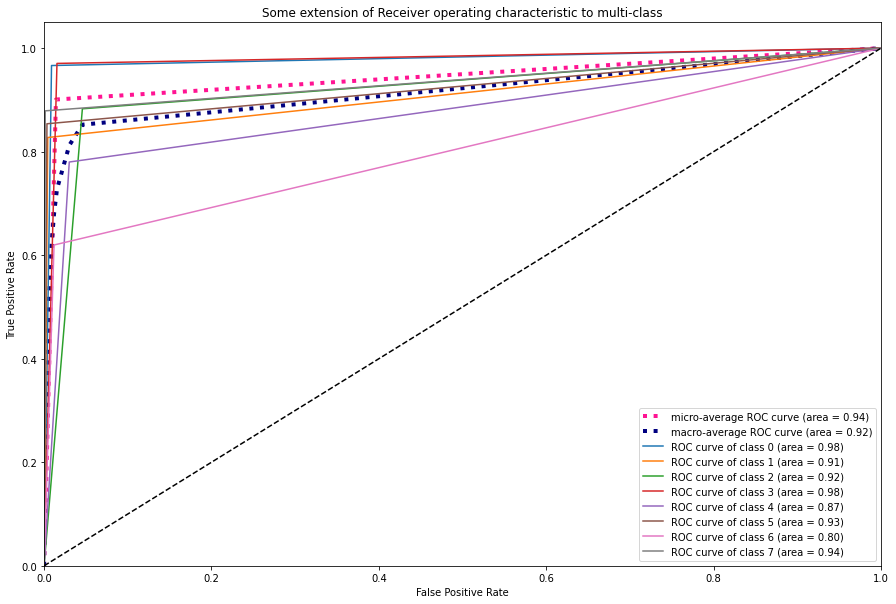

In [55]:
# ROC 圖
n_classes = 8

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(true_roc[:, i], D_roc[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(true_roc.ravel(), D_roc.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
  mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot
plt.figure(figsize=(15, 10))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

for i in range(n_classes):
  plt.plot(fpr[i], tpr[i],
      label='ROC curve of class {0} (area = {1:0.2f})'
      ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()